In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('df_cycle1.csv')

1. 시간가동율(유용성) = `가동시간 / 부하시간` 
2. 성능가동율(생산성) = `(이론 cycle time * 생산량) / 가동시간`
3. 종합수율(양품율) = `양품수 / 투입수`

### 🍳 시간가동율
- 가동시간 : 설비가 실제 동작한 시간
    - status == 2인 시간들의 총합
- 부하시간 : 설비가 생산을 하기로 계획된 전체 시간
    - status가 있는 시간 구간 전체

In [4]:
# Timestamp를 datetime으로 변환
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df["time_diff"] = df["Timestamp"].diff()

In [5]:
# 가동시간

# STATUS == 2인 데이터 필터링
df_status2 = df[df["STATUS"] == 2].copy()

# 첫 행은 NaT이므로 제거, 그 후 시간차의 합
run_time = df_status2["time_diff"].dropna().dt.total_seconds().sum()

In [6]:
run_time

np.float64(27279.0)

- 없는 데이터 시간까지 포함해서 전혀 다른 값이 나옴
- 기록에 없는 시간은 제거
    - 46s

In [27]:
# 부하시간

load_time = df["time_diff"].dropna().dt.total_seconds().sum()

In [28]:
load_time

np.float64(44505.0)

In [29]:
oee1 = run_time / load_time
oee1

np.float64(0.6129423660262892)

### 🍳 성능가동율
- 이론 cycle time : 한 개의 제품을 생산하는데 걸린 시간
- 생산량 : 해당 기간 내 생산량

In [31]:
df

,Timestamp,OUTPUT_COUNT_DAY_1,KO6_MOTOR_SET_FREQ,CUTTING_SET_FREQ,STATUS,KO5_MOTOR_SET_FREQ,METAL_OIL_SUPPLY_PRESS_CONTR,KO4_MOTOR_SET_FREQ,KO2_MOTOR_SET_FREQ,MAIN_MOTOR_CURR,...,KO1_MOTOR_INVERTER_ALM,TRANS_POS_DOWN_SET_H,OUTPUT_COUNT_DAY_2,OUTPUT_COUNT_SUM,TRANS_POS_DOWN,TRANS_POS_RIGHT,MAIN_MOTOR_ALM,DAY_1_DIFF,CYCLE,time_diff
0,2022-05-02 08:14:21,0.5,3000.0,3000.0,2.0,3000.0,295.200,3000.0,3000.0,4391.0,...,0.5,2000.0,6.5,55158.0,648.000,1748.66,0.0,-65533.5,1,NaT
1,2022-05-02 08:14:22,2.5,3000.0,3000.0,2.0,3000.0,294.000,3000.0,3000.0,4439.0,...,0.5,2000.0,8.5,55158.0,648.555,1748.14,0.0,2.0,1,0 days 00:00:01
2,2022-05-02 08:14:23,5.0,3000.0,3000.0,2.0,3000.0,289.700,3000.0,3000.0,5879.0,...,0.5,2000.0,11.0,55158.0,647.333,1749.44,0.0,2.5,1,0 days 00:00:01
3,2022-05-02 08:14:24,7.5,3000.0,3000.0,2.0,3000.0,290.200,3000.0,3000.0,4410.0,...,0.5,2000.0,13.5,55158.0,646.900,1748.66,0.0,2.5,1,0 days 00:00:01
4,2022-05-02 08:14:25,10.0,3000.0,3000.0,2.0,3000.0,287.750,3000.0,3000.0,6645.0,...,0.5,2000.0,16.0,55158.0,648.444,1748.44,0.0,2.5,1,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44462,2022-05-02 20:36:02,65524.5,3000.0,3000.0,2.0,3000.0,156.100,3000.0,3000.0,4071.0,...,0.5,2000.0,65530.5,55813.0,644.500,1732.77,0.0,2.5,1,0 days 00:00:01
44463,2022-05-02 20:36:03,65526.5,3000.0,3000.0,2.0,3000.0,163.666,3000.0,3000.0,5457.0,...,0.5,2000.0,65532.5,55813.0,645.777,1732.75,0.0,2.0,1,0 days 00:00:01
44464,2022-05-02 20:36:04,65529.0,3000.0,3000.0,2.0,3000.0,170.000,3000.0,3000.0,4820.0,...,0.5,2000.0,43689.6,55813.0,645.125,1733.22,0.0,2.5,1,0 days 00:00:01
44465,2022-05-02 20:36:05,65531.5,3000.0,3000.0,2.0,3000.0,171.100,3000.0,3000.0,4181.0,...,0.5,2000.0,1.5,55813.0,644.888,1733.20,0.0,2.5,1,0 days 00:00:01


In [32]:
cycle_time = 1 / 2.5 # 1초에 2.5개 생산
day11_output = 65534.0 # 일일생산량
work_time = 44467 # 일일가동시간(2022-05-02 08:14:21 ~ 2022-05-02 20:36:06)

In [33]:
oee2 = cycle_time * day11_output / work_time
oee2

0.5895068252861673

## 🍳 종합수율
- 양품수, 투입수가 없음
- 일단 빼고 계산해보기
- 알람/경고 횟수 기반으로 추정


---
## cycle 확인

In [23]:
df = pd.read_csv('data.csv')

In [24]:
df_co = df.copy()

# df에서 모든 값이 0인 경우 제거
df_co = df_co.loc[~(df_co.drop(columns=['Timestamp']) == 0).all(axis=1)]

In [25]:
df_co['DAY_1_DIFF'] = df_co['OUTPUT_COUNT_DAY_1'].diff()


# 초기 상태 추가: 첫 번째 인덱스를 사이클의 시작점으로 지정
reset_points = [0]

# 값이 다시 작아지는 지점 → 그 다음 행을 새로운 사이클의 시작점으로 지정
for i in range(1, len(df_co)):
    if df_co['OUTPUT_COUNT_DAY_1'].iloc[i] < df_co['OUTPUT_COUNT_DAY_1'].iloc[i - 1]:
        reset_points.append(i)

In [26]:
# 마지막 인덱스를 끝점으로 추가
reset_points.append(len(df_co))

cycles = []
for i in range(len(reset_points) - 1):
    start = reset_points[i]
    end = reset_points[i + 1]
    cycle_df = df_co.iloc[start:end].copy()
    cycle_df['CYCLE'] = i  # 사이클 번호 추가
    cycles.append(cycle_df)


In [27]:
df_cycle = pd.concat(cycles, ignore_index=True)

In [58]:
df_cycle31 = df_cycle[df_cycle['CYCLE'] == 31]

In [ ]:
# 0번째는 일일 생산량이 있는 상태에서 시작하니까 cycle 1로 test
df_cycle1 = df_cycle[df_cycle['CYCLE'] == 1]

기울기 (slope): 0.009999765701442453
절편 (intercept): 55157.82273734661


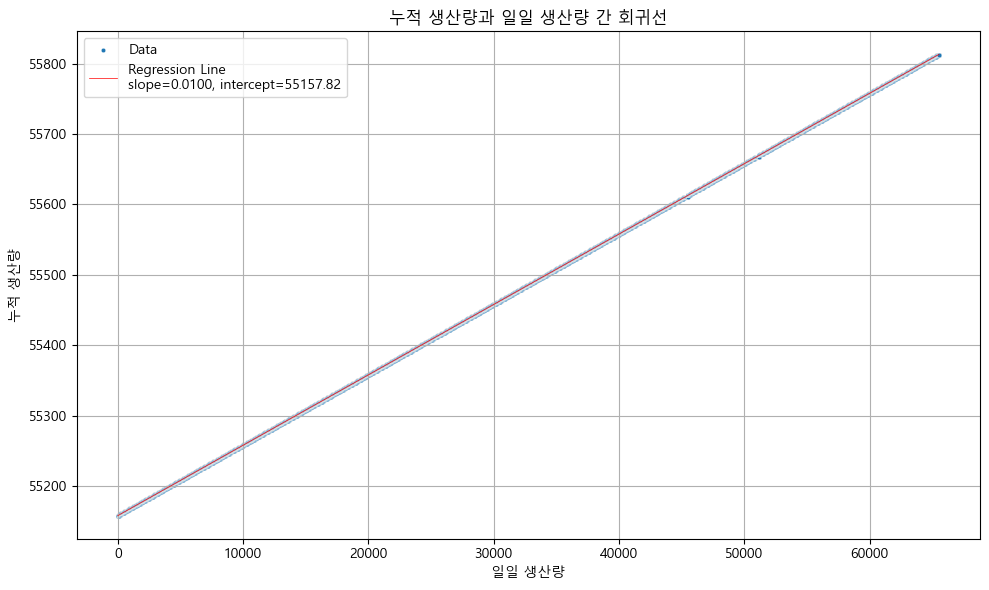

In [77]:
from sklearn.linear_model import LinearRegression

x = df_cycle1['OUTPUT_COUNT_DAY_1'].values.reshape(-1, 1) # 일일 생산량
y = df_cycle1['OUTPUT_COUNT_SUM'].values.reshape(-1, 1)   # 누적 생산량

# 선형 회귀 모델 피팅
model = LinearRegression()
model.fit(x, y)

# 회귀선 정보
slope = model.coef_[0][0]
intercept = model.intercept_[0]
print(f"기울기 (slope): {slope}")
print(f"절편 (intercept): {intercept}")

# 예측값 생성
y_pred = model.predict(x)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.flatten(), y=y.flatten(), label='Data', alpha=1, s=10)
plt.plot(x, y_pred, color='red',linewidth=0.5, label=f'Regression Line\nslope={slope:.4f}, intercept={intercept:.2f}')
plt.xlabel('일일 생산량')
plt.ylabel('누적 생산량')
plt.title('누적 생산량과 일일 생산량 간 회귀선')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
